In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



In [24]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [25]:
df = pd.read_csv('Churn_Modelling.csv')
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_cols.tolist())


Categorical columns: ['Surname', 'Geography', 'Gender']


In [28]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nData after encoding:")
print(df.head(5))


Data after encoding:
   RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602     1115          619          0       0   42   
1          2    15647311     1177          608          2       0   41   
2          3    15619304     2040          502          0       0   42   
3          4    15701354      289          699          0       0   39   
4          5    15737888     1822          850          2       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63  

In [29]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean().round(1), inplace=True)

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Detecting outliers (example: CreditScore column):


<Axes: xlabel='CreditScore'>

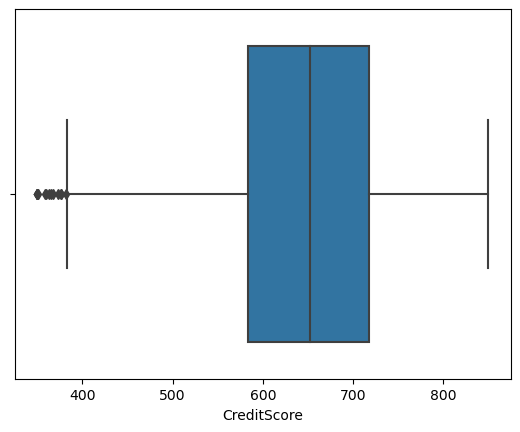

In [30]:
print("\nDetecting outliers (example: CreditScore column):")
sns.boxplot(x=df['CreditScore'])

In [31]:
print("\nStatistics for 'CreditScore':")
df['CreditScore'].describe()


Statistics for 'CreditScore':


count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [32]:
X = df.drop('Exited', axis=1).values  # Features (drop target column)
y = df['Exited'].values   

print("\nFeature Matrix (X):")
print(X)
print("\nLabel Vector (y):")
print(y)


Feature Matrix (X):
[[1.0000000e+00 1.5634602e+07 1.1150000e+03 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [2.0000000e+00 1.5647311e+07 1.1770000e+03 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [3.0000000e+00 1.5619304e+07 2.0400000e+03 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [9.9980000e+03 1.5584532e+07 1.5700000e+03 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [9.9990000e+03 1.5682355e+07 2.3450000e+03 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+04 1.5628319e+07 2.7510000e+03 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]

Label Vector (y):
[1 0 1 ... 1 1 0]


In [35]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [36]:
pd.DataFrame(X_normalized, columns=df.columns[:-1]).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0000,0.275616,0.380416,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.0001,0.326454,0.401569,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.0002,0.214421,0.696008,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.0003,0.542636,0.098601,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,0.0004,0.688778,0.621631,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

print("\nShapes of Training and Testing sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of Training and Testing sets:
X_train: (8000, 13)
X_test: (2000, 13)
y_train: (8000,)
y_test: (2000,)
